Dans ce notebook on regarde l'évolution de $KKL_{\alpha}(\hat{p},\hat{q})$ lorsque que le nombre $n = m$ de point issus de $p$ et de $q$ augmentent. On fait varier les $\alpha$, $d$ et la lois $q$.

In [1]:
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt
import scipy.optimize as sco 

import kkl.divergences as dv
import kkl.kernels as kl
import kkl.generate_data as gy 

import cProfile

In [57]:
plt.rcParams['xtick.labelsize'] = 25  
plt.rcParams['ytick.labelsize'] = 25  
plt.rcParams['legend.fontsize'] = 10  
plt.rcParams['axes.labelsize'] = 25
plt.rcParams['axes.titlesize'] = 25  

# Pour différents $\alpha$, $d=2$, $\sigma$ fixe, p,q gaussian.

In [28]:
alpha = 0.1

## KERNEL ###
sigma = 2
k = lambda x,y :  kl.k_gauss(x,y,sigma)
dk = lambda x,y : kl.dk_gauss(x, y, sigma)


#parameters of p and q
mux = np.array([10,10])
Mux = np.array([1/k *mux for k in range(1,17)])
Lx = np.array([[1/2,1/3],[1/4,-2]])
Sigmax = Lx @ Lx.transpose()
muy = np.array([0,0])
Ly = np.array([[1/5, -1],[1/2,1/2]])
Sigmay = Ly @ Ly.transpose() 


In [73]:
N = [5,10,15,20,30,40,50,60,80,100,120,150,200,250,300,400,500,600,800,1000]
nb_it = 20 #nombre de calcul de KKL pour un même n 
for alpha in [1e-6,1e-5,0.0001,0.001,0.01,0.1,0.5]:
    KKL_n = np.zeros(len(N))
    I_KKL_n = np.zeros(len(N))
    for j in range(len(N)):
        F = np.zeros(nb_it)
        for i in range(nb_it):
            y = gy.gaussian(muy,Sigmay,N[j]) 
            x = gy.gaussian(1/5 *mux,Sigmax,N[j])

            Ky = 1/N[j] * k(y,y) 

            J = lambda x,y : dv.KKL(x,y,k,Ky,alpha) 
            F[i] = J(x,y)
        KKL_n[j] = np.mean(F)
        I_KKL_n[j] = np.std(F)

    name_KKL = 'kkl_emp_d_2_alpha_'+str(alpha)+'_KKL.npy'
    np.save('save_data/KKL_empirique/'+name_KKL, KKL_n)
    
    name_I_KKL = 'kkl_emp_d_2_alpha_'+str(alpha)+'I_KKL.npy'
    np.save('save_data/KKL_empirique/'+name_I_KKL, I_KKL_n)

    plt.plot(N,KKL_n,label = r"$\alpha =$ " + str(alpha))
    plt.fill_between(N,KKL_n - I_KKL_n,KKL_n + I_KKL_n,alpha = 0.5)
    
    plt.xlabel('number of particules')
    plt.ylabel(r'KKL$_{\alpha}(\hat{p}||\hat{q})$')
    plt.legend()
# plt.savefig('plots_neurips/ev_n_d_2.pdf')

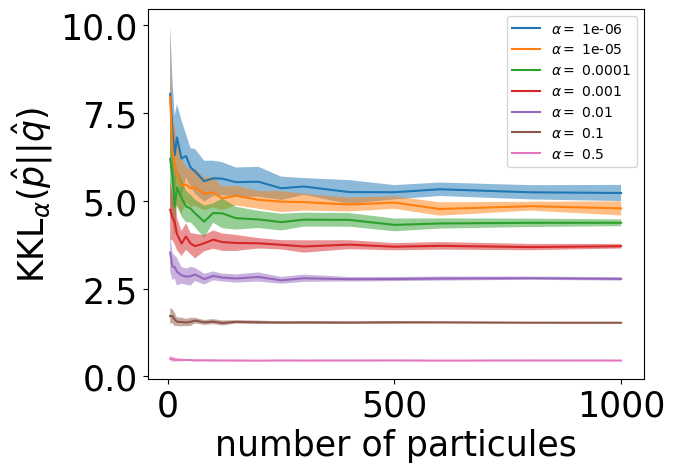

In [65]:
import os
N = [5,10,15,20,30,40,50,60,80,100,120,150,200,250,300,400,500,600,800,1000]
for alpha in [1e-6,1e-5,0.0001,0.001,0.01,0.1,0.5]:
    KKL_n = np.load('save_data/KKL_empirique/kkl_emp_d_2_alpha_'+str(alpha)+'_KKL.npy')
    I_KKL_n =  np.load('save_data/KKL_empirique/kkl_emp_d_2_alpha_'+str(alpha)+'I_KKL.npy')
    plt.plot(N,KKL_n,label = r"$\alpha =$ " + str(alpha))
    plt.fill_between(N,KKL_n - I_KKL_n,KKL_n + I_KKL_n,alpha = 0.5)
plt.xlabel('number of particules')
plt.ylabel(r'KKL$_{\alpha}(\hat{p}||\hat{q})$')
plt.legend()

output_dir = 'plots_neurips'
output_path = os.path.join(output_dir, 'ev_n_d_2.pdf')
if os.path.exists(output_path):
    os.remove(output_path)
    
plt.savefig('plots_neurips/ev_n_d_2.pdf',bbox_inches='tight',dpi = 300)

#  Different $\alpha$, $d=10$, $\sigma$ fixed, p,q Gaussians.

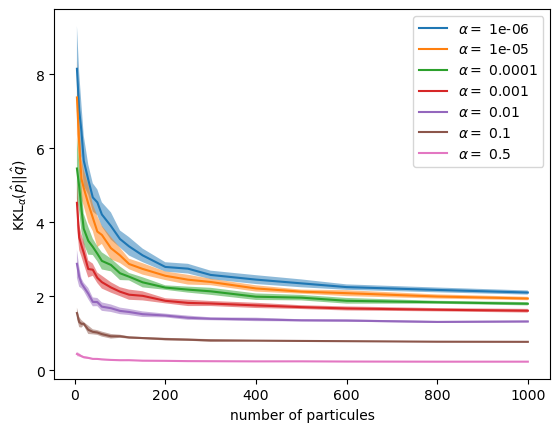

In [8]:
alpha = 0.1
d=10

## KERNEL ###
sigma = 10
k = lambda x,y :  kl.k_gauss(x,y,sigma)
dk = lambda x,y : kl.dk_gauss(x, y, sigma)

#parameters of p and q
mux = 2*np.ones(d)
Lx = np.random.randn(d,d)
Sigmax = Lx @ Lx.transpose()
muy = np.zeros(d)
Ly = np.random.randn(d,d)
Sigmay = Ly @ Ly.transpose() 

N = [5,10,15,20,30,40,50,60,80,100,120,150,200,250,300,400,500,600,800,1000]
nb_it = 20 #nombre de calcul de KKL pour un même n  
for alpha in [1e-6,1e-5,0.0001,0.001,0.01,0.1,0.5]:
    KKL_n = np.zeros(len(N))
    I_KKL_n = np.zeros(len(N))
    for j in range(len(N)):
        F = np.zeros(nb_it)
        for i in range(nb_it):
            y = gy.gaussian(muy,Sigmay,N[j])
            x = gy.gaussian(1/5 *mux,Sigmax,N[j])

            Ky = 1/N[j] * k(y,y) 

            J = lambda x,y : dv.KKL(x, y,k,Ky,alpha) 
            F[i] = J(x,y)
        KKL_n[j] = np.mean(F)
        I_KKL_n[j] = np.std(F)
        
    name_KKL = 'kkl_emp_d_10_alpha_'+str(alpha)+'_KKL.npy'
    np.save('save_data/KKL_empirique/'+name_KKL, KKL_n)

    name_I_KKL = 'kkl_emp_d_10_alpha_'+str(alpha)+'I_KKL.npy'
    np.save('save_data/KKL_empirique/'+name_I_KKL, I_KKL_n)

    plt.plot(N,KKL_n,label = r"$\alpha =$ " + str(alpha))
    plt.fill_between(N,KKL_n - I_KKL_n,KKL_n + I_KKL_n,alpha = 0.5)
    plt.xlabel('number of particules')
    plt.ylabel(r'KKL$_{\alpha}(\hat{p}||\hat{q})$')
    plt.legend()
plt.savefig('plots_neurips/ev_n_d_10.pdf')

# Pour différents $d$, $\alpha$ fixe et $\sigma$ scott rule.

C:\Users\cleme\DOC\Annee_2023_2024\code\Regularized\kkl\divergences.py:10: RuntimeWarning: invalid value encountered in log
  return np.where(t > 0, np.log(t), 0.)
C:\Users\cleme\AppData\Local\Temp\ipykernel_2272\4190582189.py:31: ComplexWarning: Casting complex values to real discards the imaginary part
  F[i] = J(x,y)


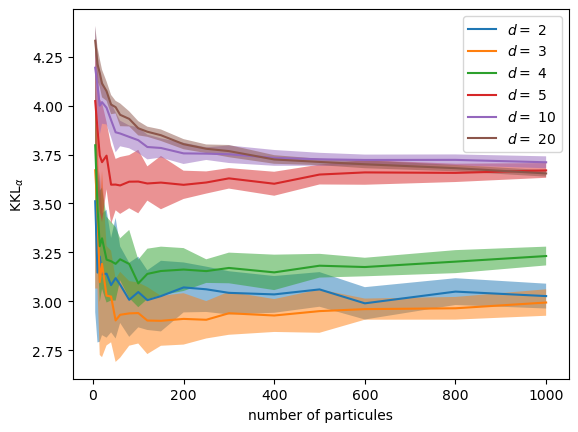

In [10]:
alpha = 0.01
N = [5,10,15,20,30,40,50,60,80,100,120,150,200,250,300,400,500,600,800,1000]
nb_it = 20 

for d in [2,3,4,5,10,20]:
    
    mux = np.zeros(d)
    Lx = np.random.randn(d,d)
    Sigmax = Lx @ Lx.T
    
    muy = np.ones(d)
    Ly = np.random.randn(d,d)
    Sigmay = Ly @ Ly.T
    
    KKL_n = np.zeros(len(N))
    I_KKL_n = np.zeros(len(N))
    
    for j in range(len(N)):
        F = np.zeros(nb_it) 
        for i in range(nb_it):
            y = gy.gaussian(muy,Sigmay,N[j]) 
            x = gy.gaussian(mux,Sigmax,N[j])
            
            sigma = np.sqrt(1/(2*N[j])**2 * np.sum((x[:,None]-y[None,:])**2)) * (2*N[j])**(-1/(d+4))
            k = lambda x,y :  kl.k_gauss(x,y,sigma)
            dk = lambda x,y : kl.dk_gauss(x, y, sigma)
    

            Ky = 1/N[j] * k(y,y) 

            J = lambda x,y : dv.KKL(x, y,k,Ky,alpha) 
            F[i] = J(x,y)
            
        KKL_n[j] = np.mean(F)
        I_KKL_n[j] = np.std(F)
    
    name_KKL = 'kkl_emp_alpha_0_01_d_'+str(d)+'_KKL.npy'
    np.save('save_data/KKL_empirique/'+name_KKL, KKL_n)
    
    name_I_KKL = 'kkl_emp_alpha_0_01_d_'+str(d)+'I_KKL.npy'
    np.save('save_data/KKL_empirique/'+name_I_KKL, I_KKL_n)

    plt.plot(N,KKL_n,label = r"$d =$ " + str(d))
    plt.fill_between(N,KKL_n - I_KKL_n,KKL_n + I_KKL_n,alpha = 0.5)
    #plt.title("Evolution of " + r"$KKL_{\alpha}$" + " for sets of points from 2 gaussians distribution with increasing number \n of particules " + r"$n$." + " Parameters : " + r"$\sigma = $ " + str(sigma) + r" $\alpha$" + str(alpha)  ,fontsize = 16)
    plt.xlabel('number of particules')
    plt.ylabel(r'KKL$_{\alpha}$')
    plt.legend()
plt.savefig('plots_neurips/ev_n_alpha_001.pdf')

#  $y \sim \mathcal{E}(1)$, $x \sim \mathcal{N}(1,1)$.

In [75]:
def k_gauss(x,y,sigma):
    dist = (x[:,None] - y[None,:])**2
    return np.exp(-dist/sigma**2)

def dk_gauss(x,y,sigma):
    return (y[None,:]-x[:,None])*k(x,y,sigma)

In [76]:
alpha = 0.1


## KERNEL ###
sigma = 2
k = lambda x,y :  k_gauss(x,y,sigma)
dk = lambda x,y : dk_gauss(x, y, sigma)

alpha = 0.1

mu_x = 2
sigma_x = 1

lambd = 1


C:\Users\cleme\DOC\Annee_2023_2024\code\Regularized\kkl\divergences.py:10: RuntimeWarning: invalid value encountered in log
  return np.where(t > 0, np.log(t), 0.)
C:\Users\cleme\AppData\Local\Temp\ipykernel_2272\1810000864.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  F[i] = J(x,y)


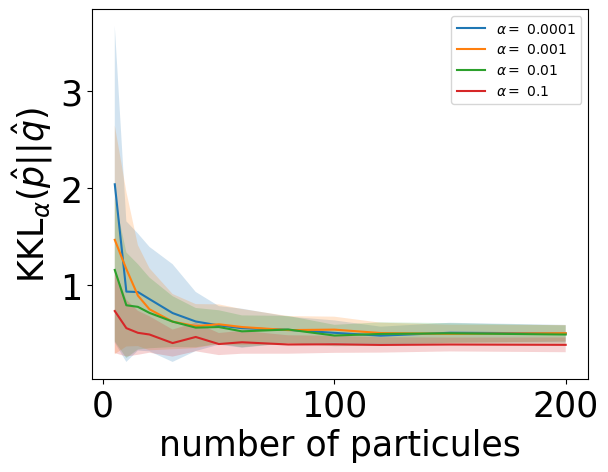

In [77]:
N = [5,10,15,20,30,40,50,60,80,100,120,150,200]#,250,300,400,500,600,800,1000]
nb_it = 100 #nombre de calcul de KKL pour un même n
for alpha in [0.0001,0.001,0.01,0.1]:
    KKL_n = np.zeros(len(N))
    I_KKL_n = np.zeros(len(N))
    for j in range(len(N)):
        F = np.zeros(nb_it)
        for i in range(nb_it):
            x = scs.norm.rvs(mu_x,sigma_x,N[j]) 
            y = np.random.exponential(scale=1/lambd, size=N[j])

            Ky = 1/N[j] * k(y,y) 

            J = lambda x,y : dv.KKL(x, y,k,Ky,alpha) 
            F[i] = J(x,y)
        KKL_n[j] = np.mean(F)
        I_KKL_n[j] = np.std(F)
    
    name_KKL = 'kkl_emp_exp_alpha_'+str(alpha)+'_KKL.npy'
    np.save('save_data/KKL_empirique/'+name_KKL, KKL_n)

    name_I_KKL = 'kkl_emp_exp_alpha_'+str(alpha)+'I_KKL.npy'
    np.save('save_data/KKL_empirique/'+name_I_KKL, I_KKL_n)

    plt.plot(N,KKL_n,label = r"$\alpha =$ " + str(alpha))
    plt.fill_between(N,KKL_n - I_KKL_n,KKL_n + I_KKL_n,alpha = 0.2)
    plt.xlabel('number of particules')
    plt.ylabel(r'KKL$_{\alpha}(\hat{p}||\hat{q})$')
    plt.legend()
plt.savefig('plots_neurips/ev_n_expo_la.pdf')